# FIFA World Cup Data Exploration

In this notebook, we'll explore the dataset previously cleaned to try and identify features that can help us predict a match outcome. First, we should import the packages that will be used to analyse the data.

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(8, 6)})

## Datasets

Let's import the datasets we have already cleaned and treated. At first, we're gonna look at the data in the _matches_ database, since it less general.

In [2]:
matches = pd.read_csv('data/WorldCupMatches_clean.csv')
players = pd.read_csv('data/WorldCupPlayers_clean.csv')
world_cups = pd.read_csv('data/WorldCups_clean.csv')

In [3]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


Looking at the info present in _matches_, we can see that a few columns do not (or, at least, should not) interfere in the match outcome. Let's drop those columns.

In [4]:
matches.drop(columns=['Stadium', 'City', 'Attendance', 'Referee', 'Assistant 1', 'Assistant 2'], inplace=True)

## Home vs Away

Let's analyse if there is any correlation between a team being the "match host" (Home Team) and the match result. We will use the following method to identify the match winners.

In [34]:
def who_won(s):
    """Method to retrieve initials of match winner"""
    import re
    penalty_score_pattern = re.compile(r'\(\s*(\d+)\s*\-\s*(\d+)\s*\)')
    
    # Winner during regular time
    if s['Home Team Goals'] > s['Away Team Goals']:
        return s['Home Team Initials']
    elif s['Home Team Goals'] < s['Away Team Goals']:
        return s['Away Team Initials']
    
    # Winner during extra time or penalties
    if s['Home Team Name'] in s['Win conditions'].strip():
        return s['Home Team Initials']
    if s['Away Team Name'] in s['Win conditions'].strip():
        return s['Away Team Initials']
    
    # Winner during penalties (no name in win conditions)
    match = penalty_score_pattern.search(s['Win conditions'])
    if match is not None:
        home_penalties, away_penalties = map(int, match.groups())
        if home_penalties > away_penalties:
            return s['Home Team Initials']
        if home_penalties < away_penalties:
            return s['Away Team Initials']
    
    return '-'

def home_away_won(s):
    """Method to retrieve if match winner was home or away team"""
    if s['Winner Initials'] == '-':
        return '-'
    
    return 'Home' if s['Winner Initials'] == s['Home Team Initials'] else 'Away'

In [7]:
matches['Winner Initials'] = matches.apply(who_won, axis=1)
matches['Home/Away Winner'] = matches.apply(home_away_won, axis=1)

Since the choice of being home or away team does not reflect to where the match will be held, this distribution of wins between Home and Away teams should be similar. However, that's not true, as the figure below shows.

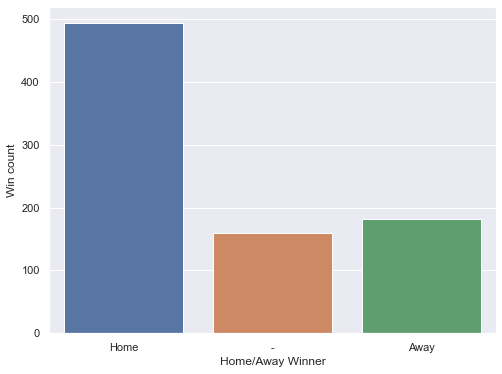

In [35]:
sns.countplot(x='Home/Away Winner', data=matches)
plt.ylabel('Win count')
plt.show()

If we observe this distribution accross the editions we see that the distribution is more similar on the recent editions than the first ones. However, it still seems that home teams have a little advantage over away teams.

This could be explained by how FIFA arrange the teams. Usually, well-ranked teams are more likely to be labeled as the home team of a match, justifying the distribution.

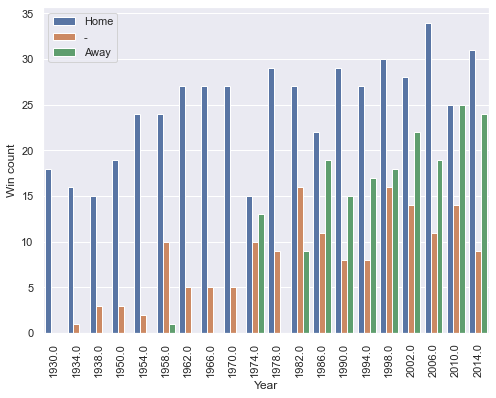

In [36]:
sns.countplot(x='Year', data=matches, hue='Home/Away Winner')
plt.xticks(rotation=90)
plt.ylabel('Win count')
plt.legend(loc=2)
plt.show()